# Deep Neural Networks from Scratch

## Introduction
This tutorial teaches you to build deep neural networks from scratch using only NumPy. By the end, you'll understand how neural networks work at the lowest level.

## Prerequisites
- Basic Python knowledge
- Understanding of matrices and derivatives (calculus)
- Jupyter notebook environment

## Part 1: Setting Up and Understanding the Data

### Cell 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Explanation:**
- Line 1: Import NumPy for numerical computations and matrix operations
- Line 2: Import matplotlib for visualizing our data and results

### Cell 2: Set Random Seed

In [ ]:
np.random.seed(42)

In [ ]:
# Example: 2x3 array
random_array = np.random.rand(2, 3)
print(random_array)


[[0.53182759 0.63440096 0.84943179]
 [0.72445532 0.61102351 0.72244338]]


In [ ]:
# Set the seed for reproducibility
np.random.seed(123)

# Generate a 2x4 array of random integers between 0 (inclusive) and 10 (exclusive)
seeded_random_array = np.random.randint(0, 10, size=(2, 4))

print(seeded_random_array)

[[2 2 6 1]
 [3 9 6 1]]


**Explanation:**
- Line 1: Set random seed to ensure reproducible results across different runs

### Cell 3: Create Simple Dataset

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

**Explanation:**
- Line 1: Create input data X with 4 samples, each having 2 features (XOR problem)
- Line 2: Create target labels y - this is the XOR truth table (output is 1 when inputs differ)

### Cell 4: Examine Data Shape

In [ ]:
print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (4, 2)
Output shape: (4, 1)


**Explanation:**
- Line 1: Print the shape of input data (4 samples × 2 features)
- Line 2: Print the shape of output data (4 samples × 1 output)

### Cell 5: Visualize the Data

Text(0.5, 0, 'Feature 1')

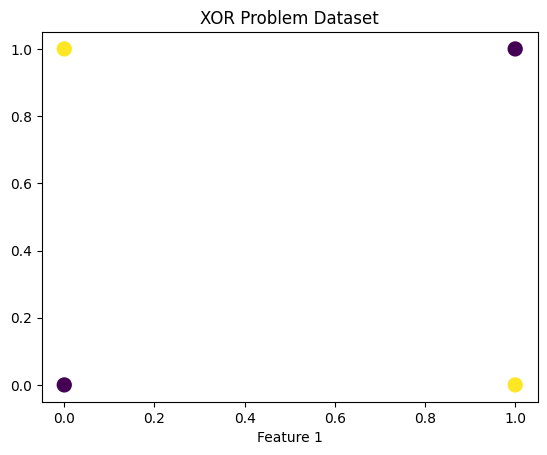

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', s=100)
plt.title("XOR Problem Dataset")
plt.xlabel("Feature 1")

**Explanation:**
- Line 1: Create scatter plot where colors represent different classes (0=dark, 1=bright)
- Line 2: Add title to explain this is the XOR problem
- Line 3: Label the x-axis as Feature 1

## Part 2: Activation Functions

### Cell 6: Define Sigmoid Function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Explanation:**
- Line 1: Define function that takes any real number and squashes it between 0 and 1
- Line 2: This is the mathematical formula: σ(x) = 1/(1+e^(-x))

### Cell 7: Define Sigmoid Derivative

In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

**Explanation:**
- Line 1: Define the derivative of sigmoid function (needed for backpropagation)
- Line 2: Mathematical property: σ'(x) = σ(x) × (1 - σ(x))

### Cell 8: Test Activation Functions

In [ ]:
test_values = np.array([-2, -1, 0, 1, 2])
print(f"Sigmoid: {sigmoid(test_values)}")
print(f"Derivative: {sigmoid_derivative(test_values)}")

Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Derivative: [0.10499359 0.19661193 0.25       0.19661193 0.10499359]


**Explanation:**
- Line 1: Create test values to see how our functions behave
- Line 2: Print sigmoid outputs (should be between 0 and 1)
- Line 3: Print derivative values (should be positive). x=0 Has the Maximum Derivative. it measures how steeply the sigmoid curve is changing at each point.

At x = 0:

σ(0) = 0.5
σ'(0) = 0.5 × (1 - 0.5) = 0.5 × 0.5 = 0.25
Maximum because both factors are equal and maximized




## Part 3: Neural Network Architecture

### Cell 9: Define Network Parameters

In [ ]:
input_size = 2
hidden_size = 3
output_size = 1

**Explanation:**
- Line 1: Number of input features (2 for our XOR problem)
- Line 2: Number of neurons in hidden layer (3 should be enough for XOR)
- Line 3: Number of output neurons (1 for binary classification)

### Cell 10: Initialize Weights for Input to Hidden Layer

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * 0.5
b1 = np.zeros((1, hidden_size))

**Explanation:**
- Line 1: Create weight matrix connecting inputs to hidden layer (2×3), scaled by 0.5
- Line 2: Initialize biases for hidden layer to zero (1×3)

### Cell 11: Initialize Weights for Hidden to Output Layer

In [ ]:
W2 = np.random.randn(hidden_size, output_size) * 0.5
b2 = np.zeros((1, output_size))

**Explanation:**
- Line 1: Create weight matrix connecting hidden to output layer (3×1), scaled by 0.5
- Line 2: Initialize bias for output layer to zero (1×1)

### Cell 12: Check Weight Shapes

In [ ]:
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")

W1 shape: (2, 3), b1 shape: (1, 3)
W2 shape: (3, 1), b2 shape: (1, 1)


**Explanation:**
- Line 1: Verify shapes of first layer weights and biases
- Line 2: Verify shapes of second layer weights and biases

## Part 4: Forward Propagation

### Cell 13: Forward Pass - Hidden Layer

In [ ]:
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)

**Explanation:**
- Line 1: Compute linear combination: z1 = X·W1 + b1 (before activation)
- Line 2: Apply sigmoid activation to get hidden layer outputs

### Cell 14: Forward Pass - Output Layer

In [ ]:
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

**Explanation:**
- Line 1: Compute linear combination for output layer: z2 = a1·W2 + b2
- Line 2: Apply sigmoid to get final predictions (between 0 and 1)

### Cell 15: Check Forward Pass Results

In [ ]:
print(f"Hidden layer output shape: {a1.shape}")
print(f"Final predictions: {a2.ravel()}")
print(f"Target values: {y.ravel()}")

Hidden layer output shape: (4, 3)
Final predictions: [0.61521647 0.64757458 0.62071863 0.65098344]
Target values: [0 1 1 0]


**Explanation:**
- Line 1: Verify hidden layer produces correct shape (4×3)
- Line 2: Show current predictions (probably random since weights are random)
- Line 3: Show what we want the network to learn

## Part 5: Cost Function

### Cell 16: Define Mean Squared Error

In [ ]:
def compute_cost(predictions, targets):
    return np.mean((predictions - targets) ** 2)

**Explanation:**
- Line 1: Define function that calculates how far our predictions are from targets
- Line 2: MSE formula: average of squared differences between predictions and actual values

### Cell 17: Calculate Initial Cost

In [ ]:
initial_cost = compute_cost(a2, y)
print(f"Initial cost: {initial_cost:.4f}")

Initial cost: 0.2676


**Explanation:**
- Line 1: Calculate cost with random weights (should be high)
- Line 2: Print the cost - this should decrease as we train

## Part 6: Backpropagation

In [ ]:
error_output = a2 - y
delta_output = error_output * sigmoid_derivative(z2)

**Explanation:**
- Line 1: Calculate how much our output is wrong (prediction - actual)
- Line 2: Multiply error by derivative to get gradient for output layer

### Cell 19: Hidden Layer Error (Backpropagation)

In [ ]:
error_hidden = np.dot(delta_output, W2.T)
delta_hidden = error_hidden * sigmoid_derivative(z1)

**Explanation:**
- Line 1: Propagate error backwards using weights (chain rule of calculus)
- Line 2: Apply derivative of activation function to get hidden layer gradients

### Cell 20: Calculate Weight Gradients

In [ ]:
dW2 = np.dot(a1.T, delta_output) / X.shape[0]
db2 = np.mean(delta_output, axis=0, keepdims=True)

**Explanation:**
- Line 1: Calculate gradient for output weights (average over all samples)
- Line 2: Calculate gradient for output bias (average of deltas)

### Cell 21: Calculate More Weight Gradients

In [ ]:
dW1 = np.dot(X.T, delta_hidden) / X.shape[0]
db1 = np.mean(delta_hidden, axis=0, keepdims=True)

**Explanation:**
- Line 1: Calculate gradient for hidden weights (how much to change W1)
- Line 2: Calculate gradient for hidden bias (how much to change b1)

## Part 7: Parameter Updates

### Cell 22: Set Learning Rate

In [ ]:
learning_rate = 1.0

**Explanation:**
- Line 1: How big steps we take when updating weights (1.0 is quite large but works for this simple problem)


### Cell 23: Update Output Layer Parameters

In [ ]:
W2 = W2 - learning_rate * dW2
b2 = b2 - learning_rate * db2

**Explanation:**
- Line 1: Update output weights by moving in opposite direction of gradient
- Line 2: Update output bias using its gradient

### Cell 24: Update Hidden Layer Parameters

In [ ]:
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1

**Explanation:**
- Line 1: Update hidden weights to reduce cost
- Line 2: Update hidden bias to reduce cost

## Part 8: Complete Training Function

### Cell 25: Define Training Function

In [ ]:
def train_network(X, y, epochs):
    costs = []
    return costs

**Explanation:**
- Line 1: Function that will train our network for specified number of epochs
- Line 2: List to store cost at each epoch for plotting
- Line 3: Return costs for analysis

### Cell 26: Training Loop Setup
```python
def full_training(X, y, epochs=1000):
    global W1, b1, W2, b2
    costs = []
```
**Explanation:**
- Line 1: Define complete training function with default 1000 epochs
- Line 2: Declare we'll modify global weight variables
- Line 3: Initialize list to track cost over time

### Cell 27: Single Epoch Training
```python
    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
```
**Explanation:**
- Line 1: Loop through specified number of training iterations
- Line 2: Comment explaining we start with forward pass
- Line 3: Compute hidden layer input (linear combination)

### Cell 28: Complete Forward Pass in Loop
```python
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
```
**Explanation:**
- Line 1: Apply activation to get hidden layer output
- Line 2: Compute output layer input
- Line 3: Apply final activation to get predictions

### Cell 29: Compute Cost in Loop
```python
        cost = compute_cost(a2, y)
        costs.append(cost)
```
**Explanation:**
- Line 1: Calculate current cost (how wrong our predictions are)
- Line 2: Store cost for later plotting

### Cell 30: Backpropagation in Loop
```python
        error_output = a2 - y
        delta_output = error_output * sigmoid_derivative(z2)
        error_hidden = np.dot(delta_output, W2.T)
```
**Explanation:**
- Line 1: Calculate output layer error
- Line 2: Apply chain rule for output layer gradient
- Line 3: Propagate error back to hidden layer

### Cell 31: Hidden Layer Gradients
```python
        delta_hidden = error_hidden * sigmoid_derivative(z1)
        dW2 = np.dot(a1.T, delta_output) / X.shape[0]
        db2 = np.mean(delta_output, axis=0, keepdims=True)
```
**Explanation:**
- Line 1: Calculate hidden layer gradients using chain rule
- Line 2: Compute gradient for output layer weights
- Line 3: Compute gradient for output layer bias

### Cell 32: Remaining Gradients and Updates
```python
        dW1 = np.dot(X.T, delta_hidden) / X.shape[0]
        db1 = np.mean(delta_hidden, axis=0, keepdims=True)
```
**Explanation:**
- Line 1: Compute gradient for hidden layer weights
- Line 2: Compute gradient for hidden layer bias

### Cell 33: Parameter Updates in Loop
```python
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
```
**Explanation:**
- Line 1: Update output layer weights (gradient descent step)
- Line 2: Update output layer bias
- Line 3: Update hidden layer weights

### Cell 34: Final Update and Return
```python
        b1 = b1 - learning_rate * db1
        
    return costs
```
**Explanation:**
- Line 1: Update hidden layer bias
- Line 2: Empty line for readability
- Line 3: Return list of costs for analysis

### Final Update and Return

In [ ]:
def full_training(X, y, epochs=1000):
    """
    Complete training function for the neural network

    Args:
        X: Input data
        y: Target outputs
        epochs: Number of training iterations

    Returns:
        costs: List of costs at each epoch
    """
    global W1, b1, W2, b2
    costs = []

    for epoch in range(epochs):
        # Forward Pass
        z1 = np.dot(X, W1) + b1          # Hidden layer input
        a1 = sigmoid(z1)                 # Hidden layer output
        z2 = np.dot(a1, W2) + b2         # Output layer input
        a2 = sigmoid(z2)                 # Final predictions

        # Calculate and store cost
        cost = compute_cost(a2, y)
        costs.append(cost)

        # Backward Pass (Backpropagation)
        error_output = a2 - y                              # Output error
        delta_output = error_output * sigmoid_derivative(z2) # Output delta

        error_hidden = np.dot(delta_output, W2.T)          # Hidden error
        delta_hidden = error_hidden * sigmoid_derivative(z1) # Hidden delta

        # Calculate gradients
        dW2 = np.dot(a1.T, delta_output) / X.shape[0]      # Output weights gradient
        db2 = np.mean(delta_output, axis=0, keepdims=True)  # Output bias gradient
        dW1 = np.dot(X.T, delta_hidden) / X.shape[0]       # Hidden weights gradient
        db1 = np.mean(delta_hidden, axis=0, keepdims=True)  # Hidden bias gradient

        # Update parameters (Gradient Descent)
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        # Print progress every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.6f}")

    return costs

In [ ]:
# ===== PART 6: PREDICTION FUNCTION =====

def predict(X_test):
    """Make predictions using the trained network"""
    z1 = np.dot(X_test, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a2

# ===== PART 7: TRAINING THE NETWORK =====

print("\n=== TRAINING NEURAL NETWORK ===")
print("Training started...")

# Calculate initial cost
initial_predictions = predict(X)
initial_cost = compute_cost(initial_predictions, y)
print(f"Initial cost: {initial_cost:.6f}")

# Train the network
costs = full_training(X, y, epochs=2000)

print("Training completed!")


=== TRAINING NEURAL NETWORK ===
Training started...
Initial cost: 0.261188
Epoch 0, Cost: 0.261188
Epoch 500, Cost: 0.244836
Epoch 1000, Cost: 0.197630
Epoch 1500, Cost: 0.093106
Training completed!


In [ ]:
# ===== PART 8: EVALUATING RESULTS =====

print("\n=== EVALUATION RESULTS ===")

# Get final predictions
final_predictions = predict(X)
final_cost = compute_cost(final_predictions, y)

print(f"Final cost: {final_cost:.6f}")
print(f"Cost improvement: {initial_cost - final_cost:.6f}")

# Calculate accuracy
rounded_predictions = np.round(final_predictions)
accuracy = np.mean(rounded_predictions == y) * 100
print(f"Accuracy: {accuracy:.1f}%")

# Show detailed results
print("\nDetailed Results:")
print("Input -> Predicted -> Target -> Correct?")
for i in range(len(X)):
    pred = final_predictions[i, 0]
    target = y[i, 0]
    rounded_pred = rounded_predictions[i, 0]
    correct = "✓" if rounded_pred == target else "✗"
    print(f"{X[i]} -> {pred:.3f} -> {target} -> {correct}")


=== EVALUATION RESULTS ===
Final cost: 0.019204
Cost improvement: 0.241984
Accuracy: 100.0%

Detailed Results:
Input -> Predicted -> Target -> Correct?
[0 0] -> 0.128 -> 0 -> ✓
[0 1] -> 0.865 -> 1 -> ✓
[1 0] -> 0.866 -> 1 -> ✓
[1 1] -> 0.156 -> 0 -> ✓
